In [1]:
import numpy as np
import pandas as pd

## Part1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [2]:
mobile_df = pd.read_csv('train.csv') #has 2000

In [3]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


以下是新加的部分，是来处理异常值的，比如说10%的手机宽和像素宽是0，不make sense，但因为对用户来说都很重要，所以不能随意填充，还是删掉了

In [5]:
cnt1 = (mobile_df['sc_w']==0).sum()
cnt1

180

<AxesSubplot:>

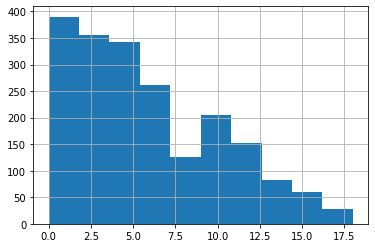

In [6]:
mobile_df['sc_w'].hist()

In [7]:
cnt2 = (mobile_df['px_height']==0).sum()
cnt2

2

<AxesSubplot:>

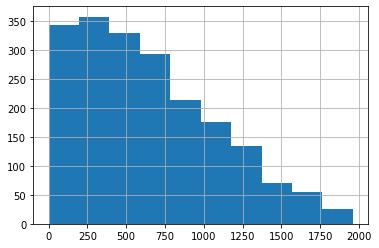

In [8]:
mobile_df['px_height'].hist()

In [9]:
mobile_df = mobile_df[(mobile_df.px_height != 0) & (mobile_df.sc_w != 0)].reset_index()

In [10]:
mobile_df

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,1995,794,1,0.5,1,0,1,2,0.8,106,...,1222,1890,668,13,4,19,1,1,0,0
1815,1996,1965,1,2.6,1,0,0,39,0.2,187,...,915,1965,2032,11,10,16,1,1,1,2
1816,1997,1911,0,0.9,1,1,1,36,0.7,108,...,868,1632,3057,9,1,5,1,1,0,3
1817,1998,1512,0,0.9,0,4,1,46,0.1,145,...,336,670,869,18,10,19,1,1,1,0


In [11]:
mobile_df.info(verbose = True, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1819 non-null   int64  
 1   battery_power  1819 non-null   int64  
 2   blue           1819 non-null   int64  
 3   clock_speed    1819 non-null   float64
 4   dual_sim       1819 non-null   int64  
 5   fc             1819 non-null   int64  
 6   four_g         1819 non-null   int64  
 7   int_memory     1819 non-null   int64  
 8   m_dep          1819 non-null   float64
 9   mobile_wt      1819 non-null   int64  
 10  n_cores        1819 non-null   int64  
 11  pc             1819 non-null   int64  
 12  px_height      1819 non-null   int64  
 13  px_width       1819 non-null   int64  
 14  ram            1819 non-null   int64  
 15  sc_h           1819 non-null   int64  
 16  sc_w           1819 non-null   int64  
 17  talk_time      1819 non-null   int64  
 18  three_g 

In [12]:
mobile_df.nunique()
#blue,dual_sim,four_g,three_g,touch_screen, wifi and price_range are all categorical
#they are all binary variables, no need to one-hot encoding

index            1819
battery_power    1052
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1070
px_width         1056
ram              1455
sc_h               15
sc_w               18
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [13]:
#get target value
y = mobile_df['price_range']

### Part1.2: Understand the features

In [14]:
#check missing values
mobile_df.isnull().sum()

index            0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
#no duplicated data
mobile_df.duplicated().sum()

0

In [16]:
#Understand Numerical feature
mobile_df.describe()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,...,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,998.379879,1238.031336,0.503573,1.519406,0.504673,4.319956,0.524464,32.156130,0.499835,140.578340,...,647.086861,1252.828477,2133.468939,12.488730,6.338098,11.009346,0.760858,0.507422,0.513469,1.509621
std,576.240108,439.989288,0.500125,0.813975,0.500116,4.355982,0.499538,18.105723,0.288875,35.437231,...,444.741154,432.418889,1087.488721,4.166008,4.153085,5.456642,0.426677,0.500082,0.499956,1.119529
min,0.000000,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,503.500000,845.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,284.000000,877.000000,1203.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,995.000000,1231.000000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,...,562.000000,1251.000000,2175.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1494.500000,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.500000,...,952.000000,1633.000000,3072.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1999.000000,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
#check the feature distribution
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

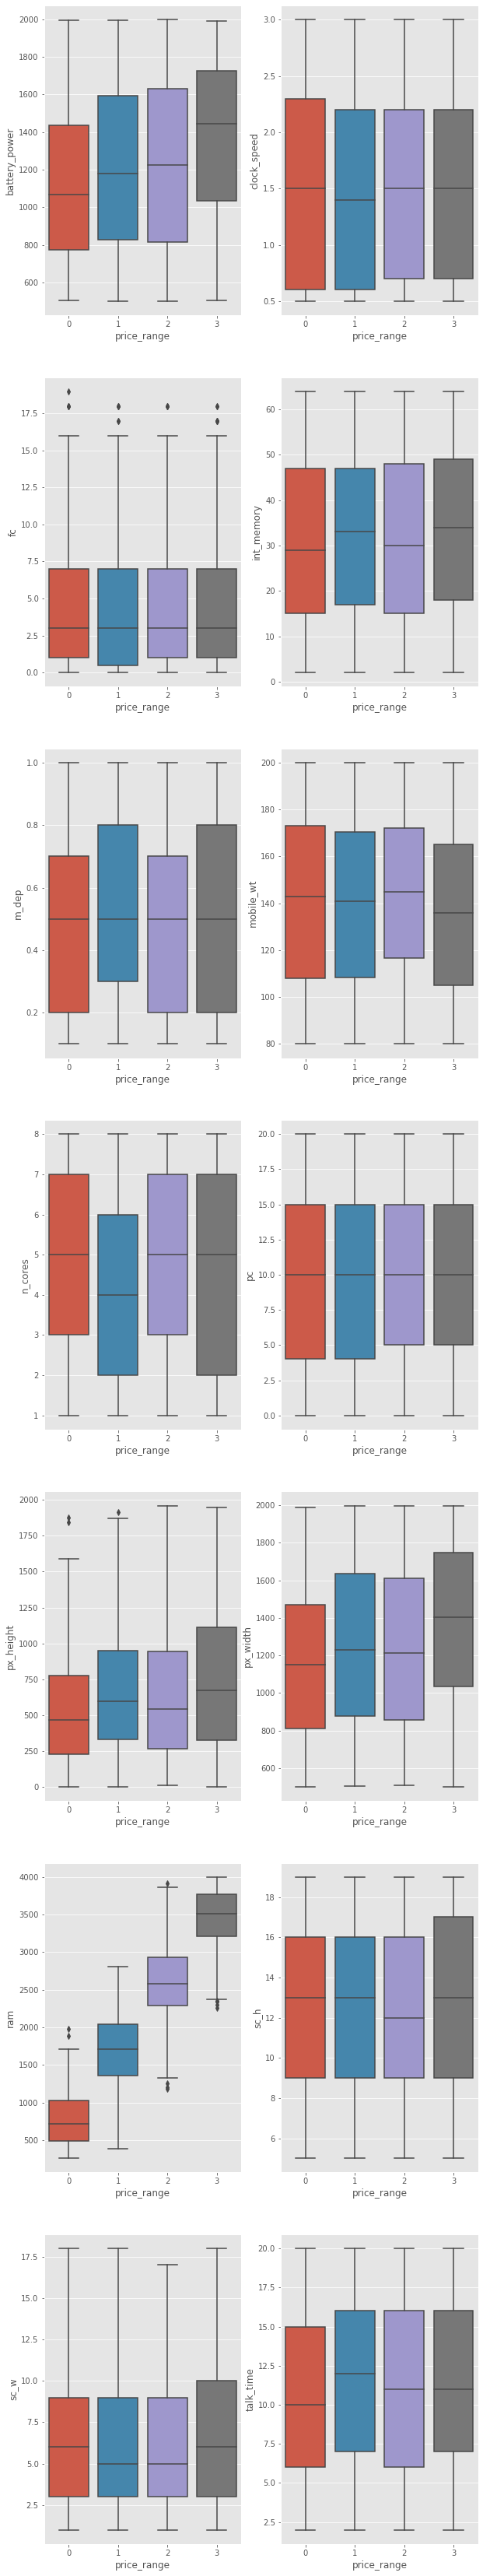

In [19]:
_,axes = plt.subplots(7,2,figsize = [10,60])
sns.boxplot(x = 'price_range', y = 'battery_power', data = mobile_df , ax= axes[0][0])#higher the better
sns.boxplot(x = 'price_range', y = 'clock_speed', data = mobile_df , ax= axes[0][1]) #doesn't seem to be correleated
sns.boxplot(x = 'price_range', y = 'fc',data = mobile_df , ax= axes[1][0]) #have outliers, doesn't seem to be correlated 
sns.boxplot(x = 'price_range', y = 'int_memory',data = mobile_df , ax= axes[1][1]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'm_dep',data = mobile_df , ax= axes[2][0]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'mobile_wt',data = mobile_df , ax= axes[2][1]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'n_cores',data = mobile_df , ax= axes[3][0]) # doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'pc',data = mobile_df , ax= axes[3][1]) #seem to be positivey correlated
sns.boxplot(x = 'price_range', y = 'px_height',data = mobile_df , ax= axes[4][0]) # seen to be positively correlated
sns.boxplot(x = 'price_range', y = 'px_width',data = mobile_df , ax= axes[4][1]) #seem to be positively correlated
sns.boxplot(x = 'price_range', y = 'ram',data = mobile_df , ax= axes[5][0])  #higher the beter, exists outlier
sns.boxplot(x = 'price_range', y = 'sc_h',data = mobile_df , ax= axes[5][1]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'sc_w',data = mobile_df , ax= axes[6][0]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'talk_time',data = mobile_df , ax= axes[6][1]) #doesn't seem to be correlated
 




<AxesSubplot:>

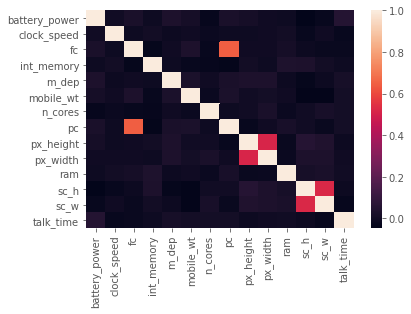

In [20]:
corr_score = mobile_df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',\
                       'pc','px_height','px_width','ram','sc_h','sc_w','talk_time']].corr()
sns.heatmap(corr_score)
#sc and fc, height and weight, which is expectable

In [21]:
corr_score = mobile_df[['fc','pc','px_height','px_width','sc_h','sc_w']].corr()
corr_score

,fc,pc,px_height,px_width,sc_h,sc_w
fc,1.000000,0.645880,-0.001558,-0.004116,-0.012501,-0.017689
pc,0.645880,1.000000,-0.021050,-0.004242,0.000101,-0.019056
px_height,-0.001558,-0.021050,1.000000,0.514228,0.060553,0.043699
px_width,-0.004116,-0.004242,0.514228,1.000000,0.033194,0.035759
sc_h,-0.012501,0.000101,0.060553,0.033194,1.000000,0.524451
sc_w,-0.017689,-0.019056,0.043699,0.035759,0.524451,1.000000


<AxesSubplot:xlabel='price_range', ylabel='count'>

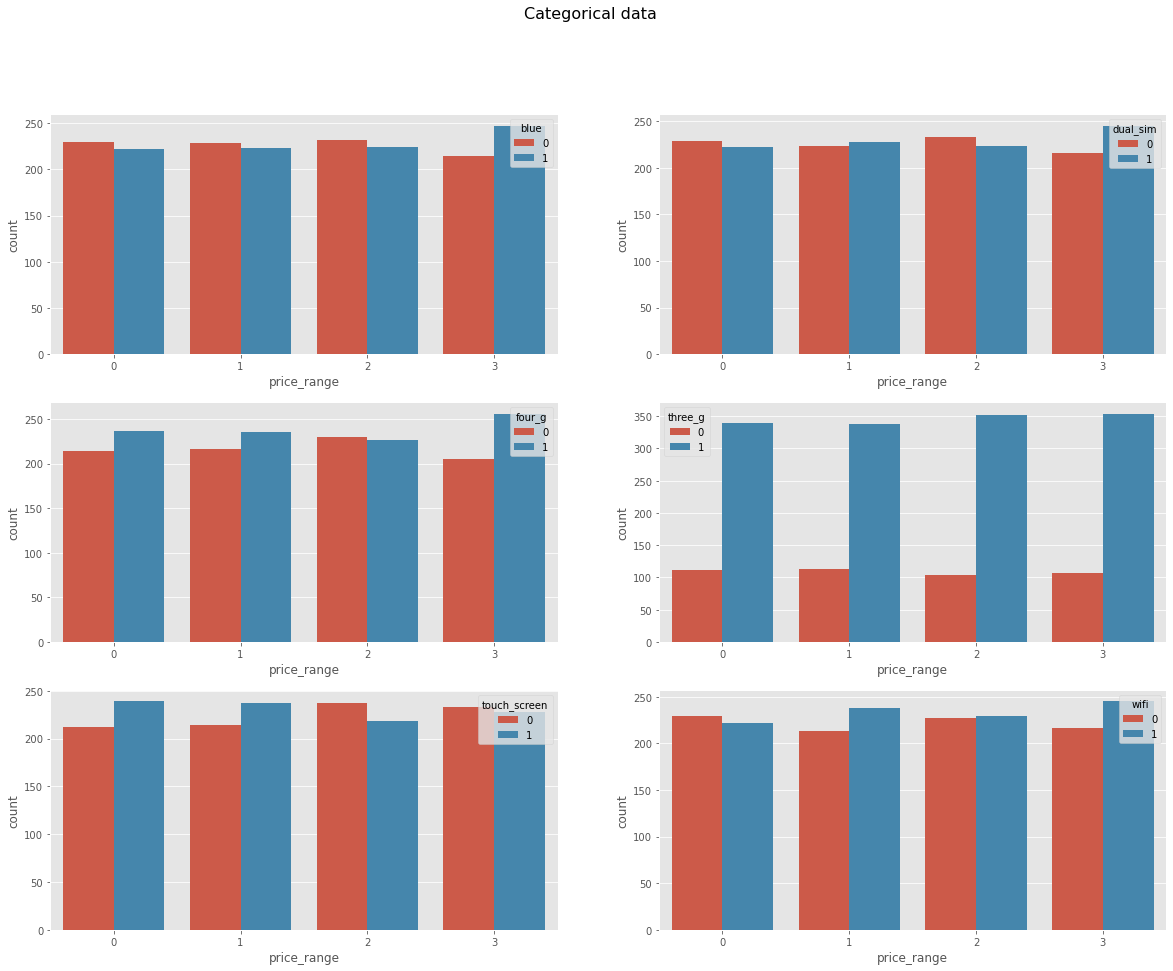

In [22]:
#now understand cateforical feature
#blue,dual_sim,four_g,three_g,touch_screen, wifi and price_range are all categorical
fig,axes = plt.subplots(3,2,figsize = [20,15])
fig.suptitle('Categorical data', fontsize=16)
sns.countplot(x = 'price_range', hue = 'blue', data = mobile_df, ax = axes[0][0])
sns.countplot(x = 'price_range', hue = 'dual_sim', data = mobile_df, ax = axes[0][1])
sns.countplot(x = 'price_range', hue = 'four_g', data = mobile_df, ax = axes[1][0])
sns.countplot(x = 'price_range', hue = 'three_g', data = mobile_df, ax = axes[1][1])
sns.countplot(x = 'price_range', hue = 'touch_screen', data = mobile_df, ax = axes[2][0])
sns.countplot(x = 'price_range', hue = 'wifi', data = mobile_df, ax = axes[2][1])
#bluttooth, dual_sim,four_g  and wifi seems to all favour the mobile pirce to some extent

/Users/benson_li/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/benson_li/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/benson_li/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='ram', ylabel='Density'>

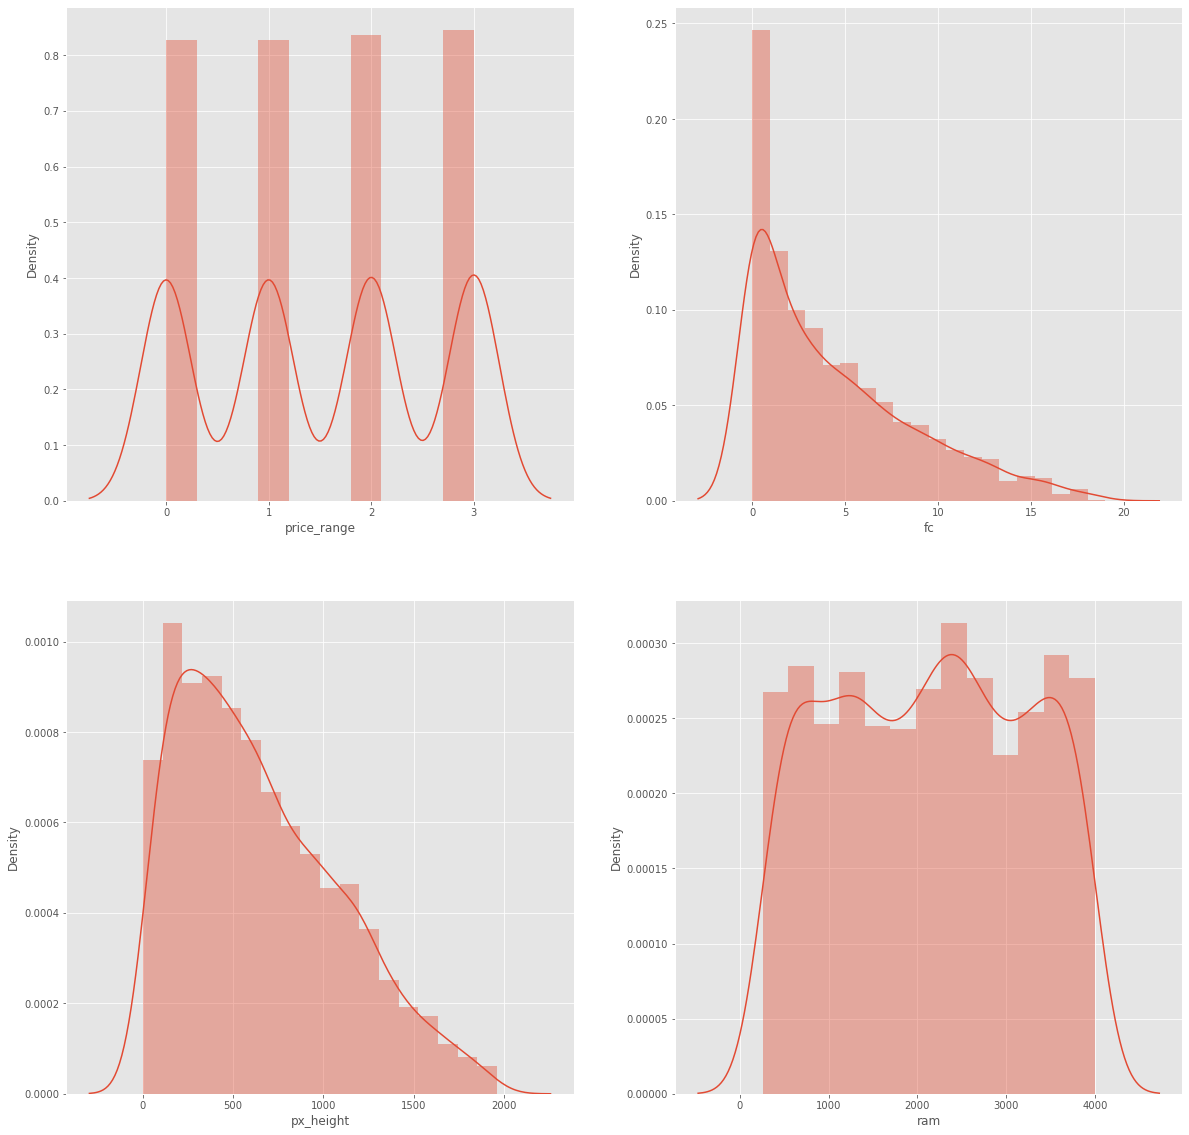

In [23]:
#Check distribution and outlier if we witness outlier point in the previous box plots.
_,axes = plt.subplots(2,2,figsize = [20,20])
sns.distplot(mobile_df.price_range, ax= axes[0][0])#higher the better
sns.distplot(mobile_df.fc, ax= axes[0][1]) #doesn't seem to be correleated
sns.distplot(mobile_df.px_height, ax= axes[1][0]) #have outliers, doesn't seem to be correlated 
sns.distplot(mobile_df.ram, ax= axes[1][1]) #doesn't seem to be correlated

#From the graph we don't think there is a need to handel outlier

## Part 2: Feature Preprocessing

### Part 2.1: Combine Features

In [24]:
#feature combine

mobile_df['sc_size'] = np.sqrt(mobile_df['sc_h']**2 + mobile_df['sc_w']**2) # 屏幕尺寸
mobile_df['pixel_size'] = mobile_df['px_height']* mobile_df['px_width'] # 像素尺寸
to_drop = ['sc_h','sc_w','price_range','px_height','px_width']
X = mobile_df.drop(to_drop, axis = 1)


<AxesSubplot:>

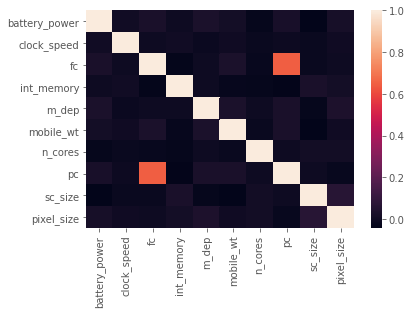

In [25]:
corr_score = X[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',\
                       'pc','sc_size','pixel_size' ]].corr()
sns.heatmap(corr_score)

In [26]:
X.head()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,sc_size,pixel_size
0,0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,11.401754,15120
1,1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,17.262677,1799140
2,2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,11.180340,2167308
3,3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,17.888544,2171776
4,4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,8.246211,1464096


In [27]:
X.tail()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,sc_size,pixel_size
1814,1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,13.601471,2309580
1815,1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,14.866069,1797975
1816,1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,9.055385,1416576
1817,1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,20.591260,225120
1818,1999,510,1,2.0,1,5,1,45,0.9,168,6,16,3919,2,1,1,1,19.416488,364182


In [28]:
X.dtypes

index              int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
ram                int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
sc_size          float64
pixel_size         int64
dtype: object

### Part 2.2 : Split DataSet

In [29]:
cat_cols = X.columns[X.nunique() == 2]
num_cols = X.columns[X.nunique() != 2]

In [30]:
print(num_cols)

Index(['index', 'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time', 'sc_size',
       'pixel_size'],
      dtype='object')


In [31]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.25, stratify = y, random_state = 1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 1364 observation with 19 features
test data has 455 observation with 19 features


### Part 2.3: Standardize/Normalize Data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<ipython-input-32-f2c586bd8531>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.transform(X_train[num_cols])
/Users/benson_li/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-32-f2c586bd8531>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [33]:
X_train.head()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,sc_size,pixel_size
985,0.154651,0.226379,0,-0.485759,0,1.586185,0,0.273074,0.680813,-0.415613,1.078425,1.705561,0.019370,-1.285808,1,0,0,-0.848737,1.095530
408,-0.943677,0.133361,0,-0.733035,0,1.352008,1,-0.386559,1.716074,1.057139,0.639198,0.368942,-1.008261,0.004324,1,1,0,-1.585338,-0.255922
589,-0.603718,-0.268208,1,-1.227586,1,-0.755579,0,1.152585,0.335726,-0.557224,-0.239256,1.037252,1.381919,1.663065,1,1,0,-1.330028,-0.878299
1041,0.255766,1.571748,0,-0.238483,0,-0.287227,0,-0.441529,1.716074,-1.548499,-0.239256,-0.967677,0.305789,0.741542,1,1,0,-1.012917,0.248210
1281,0.716018,1.685185,1,-1.227586,1,-0.287227,0,-0.606437,1.025900,-1.293600,1.517652,-0.466445,-0.385094,-0.548590,0,0,1,0.252731,-1.009514


## Part 3: Model Traing and Result Evaluation

### Part3.1:Model Training

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

#Logistic Regression
classifier_logistic = LogisticRegression()

#K Nearest Neighbots
classifier_KNN = KNeighborsClassifier()

#Random Forest
classifier_RF = RandomForestClassifier()

#GradientBoosting
classidier_GB = GradientBoostingClassifier()

In [35]:
#Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression', 'KNN' , 'Random Forest', 'Gradient Boosting' ]
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classidier_GB]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv = 5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1


[0.92307692 0.93040293 0.91575092 0.93406593 0.95220588]
Model accuracy of Logistic Regression is 0.9311005171299289
[0.58241758 0.52014652 0.58241758 0.6007326  0.59558824]
Model accuracy of KNN is 0.5762605042016807
[0.84249084 0.83882784 0.84981685 0.84249084 0.86397059]
Model accuracy of Random Forest is 0.8475193923723335
[0.86813187 0.89377289 0.91575092 0.86813187 0.90441176]
Model accuracy of Gradient Boosting is 0.8900398620986856


In [36]:
# We see that it seems like logistic regression works best

### Part 3.2: Grid Search to Find Optimal Hyperparameters

In [37]:
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(gs):
    print("Best score: "+ str(gs.best_score_))
    print('Best parameters sets:')
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ":" + str(best_parameters[param_name]))

#### Part 3.2.1: Logistic Regression

In [38]:
parameters = {
    'penalty':('l1', 'l2'),
    'C':np.linspace(1,10,20)
}
Grid_LR = GridSearchCV(LogisticRegression(solver = 'liblinear'), parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ]),
                         'penalty': ('l1', 'l2')})

In [39]:
print_grid_search_metrics(Grid_LR)

Best score: 0.8328646843352725
Best parameters sets:
C:5.263157894736842
penalty:l1


In [40]:
#best model
best_LR_model = Grid_LR.best_estimator_

In [41]:
best_LR_model.predict(X_test)

array([2, 2, 3, 3, 1, 2, 2, 1, 3, 3, 2, 0, 1, 2, 1, 2, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 1, 0, 3, 1, 1, 3, 1, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 3, 2,
       1, 3, 3, 1, 0, 3, 1, 3, 0, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 3, 1,
       0, 2, 0, 2, 1, 0, 2, 3, 3, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 2,
       1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 2, 2, 0, 0, 3, 0, 1, 0, 1, 3, 0, 3,
       3, 0, 3, 1, 2, 1, 0, 2, 0, 3, 3, 2, 2, 1, 2, 2, 2, 0, 3, 2, 3, 0,
       1, 1, 3, 0, 2, 2, 0, 3, 0, 2, 2, 2, 1, 3, 0, 1, 3, 2, 1, 1, 3, 0,
       3, 1, 0, 3, 1, 3, 3, 1, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 1, 2, 1,
       0, 3, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 3, 0, 3, 3, 1, 3, 1, 2, 2,
       1, 0, 3, 1, 1, 1, 3, 0, 0, 1, 3, 3, 0, 2, 3, 0, 2, 0, 3, 0, 3, 1,
       2, 2, 1, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 0, 3, 1, 2, 2, 0, 0, 2, 0,
       3, 3, 2, 0, 3, 2, 0, 2, 0, 1, 3, 2, 1, 1, 0, 0, 2, 1, 3, 1, 3, 0,
       0, 1, 3, 0, 2, 3, 2, 2, 3, 3, 0, 1, 2, 0, 3, 2, 2, 3, 1, 1, 1, 3,
       3, 1, 2, 3, 0, 3, 1, 3, 3, 1, 3, 1, 3, 0, 2,

In [42]:
best_LR_model.score(X_test,y_test) #not underfitting, not overfitting, no obvious difference

0.8197802197802198

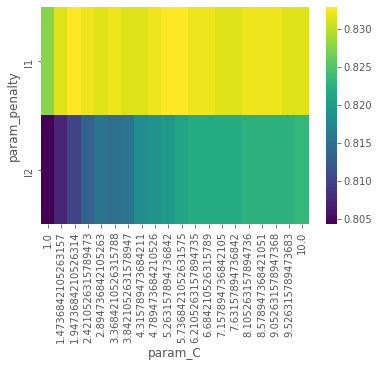

In [43]:
# L1 is better / L2 ; when C = 1.0
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index = 'param_penalty', columns = 'param_C', values ='mean_test_score'))
_=sns.heatmap(res,cmap = 'viridis')

#### Part 3.2.2 : KNN

In [44]:
parameters = {'n_neighbors': [i for i in range(1,45,2)]}
Grid_KNN =  GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43]})

In [45]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.6767183796595562
Best parameters sets:
n_neighbors:41


In [46]:
best_KNN_model = Grid_KNN.best_estimator_

In [47]:
best_KNN_model.predict(X_test)

array([2, 2, 2, 3, 1, 2, 1, 2, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 3, 2,
       1, 3, 3, 3, 0, 3, 1, 3, 0, 2, 2, 2, 0, 2, 1, 3, 2, 2, 2, 2, 3, 0,
       0, 2, 0, 2, 2, 0, 3, 3, 3, 0, 0, 2, 1, 3, 1, 3, 3, 0, 3, 3, 3, 3,
       1, 1, 2, 1, 3, 2, 3, 3, 3, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 3, 0, 3,
       3, 0, 2, 0, 2, 1, 0, 2, 1, 3, 3, 1, 2, 1, 3, 2, 1, 0, 3, 2, 3, 0,
       1, 1, 3, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 3, 0, 0, 2, 0, 1, 1, 3, 0,
       2, 1, 0, 3, 2, 3, 3, 1, 0, 0, 0, 1, 3, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       0, 3, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 3, 0, 2, 3, 1, 3, 2, 1, 2,
       1, 0, 3, 1, 2, 1, 2, 0, 0, 2, 3, 2, 0, 2, 2, 0, 2, 0, 3, 0, 3, 1,
       2, 1, 1, 3, 3, 3, 1, 3, 3, 0, 2, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 0, 3, 2, 0, 3, 0, 1, 3, 2, 1, 1, 0, 0, 1, 2, 3, 1, 3, 0,
       0, 1, 3, 0, 0, 3, 2, 2, 3, 2, 0, 2, 2, 0, 3, 0, 2, 3, 1, 0, 0, 2,
       2, 0, 2, 3, 0, 3, 1, 2, 2, 2, 3, 0, 2, 0, 0,

In [48]:
best_KNN_model.score(X_test,y_test)

0.6659340659340659

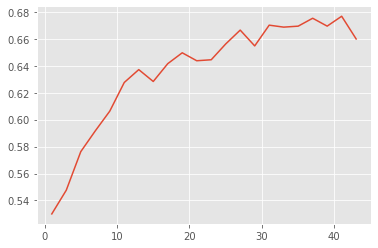

In [49]:
KNN_models = pd.DataFrame(Grid_KNN.cv_results_)
plt.plot(KNN_models['param_n_neighbors'],KNN_models['mean_test_score'])

#### Part 3.2.3 : Random Forest

# 'max_features', 'max_depth'

In [50]:
parameters = { 
    'n_estimators': [60,80,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,4,5,10],
    'criterion' :['gini', 'entropy']
}
Grid_RF =  GridSearchCV(RandomForestClassifier(),parameters,cv=5,verbose=True)
Grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 

In [ ]:
print_grid_search_metrics(Grid_RF)

Best score: 0.8636446886446887
Best parameters sets:
criterion:entropy
max_depth:10
max_features:auto
n_estimators:80


In [ ]:
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model.predict(X_test)

array([2, 1, 3, 3, 1, 2, 2, 2, 3, 3, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 3, 3,
       1, 3, 3, 1, 0, 3, 1, 3, 0, 2, 2, 3, 1, 2, 1, 3, 2, 1, 2, 0, 3, 1,
       0, 2, 0, 2, 2, 0, 2, 3, 3, 1, 0, 1, 0, 2, 0, 3, 3, 0, 2, 3, 3, 2,
       1, 1, 1, 1, 3, 2, 2, 3, 3, 0, 2, 2, 0, 0, 3, 0, 1, 0, 1, 3, 0, 3,
       3, 0, 2, 1, 2, 0, 0, 2, 0, 3, 3, 1, 2, 1, 2, 2, 1, 0, 3, 2, 3, 0,
       1, 1, 3, 0, 2, 2, 0, 3, 0, 2, 2, 2, 1, 3, 0, 1, 2, 2, 2, 1, 3, 0,
       3, 1, 0, 3, 1, 3, 3, 1, 0, 1, 0, 0, 2, 0, 0, 2, 3, 0, 0, 1, 2, 1,
       0, 3, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 3, 0, 3, 2, 1, 3, 1, 2, 2,
       1, 0, 3, 1, 2, 2, 3, 0, 0, 1, 3, 3, 0, 2, 3, 0, 2, 0, 3, 0, 3, 1,
       2, 2, 1, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 0, 3, 0, 3, 2, 0, 1, 2, 0,
       3, 3, 2, 0, 3, 2, 0, 2, 0, 1, 3, 2, 1, 1, 0, 0, 2, 1, 3, 1, 3, 0,
       0, 1, 3, 0, 1, 3, 2, 2, 3, 3, 0, 1, 1, 0, 2, 1, 2, 3, 1, 1, 1, 3,
       3, 1, 2, 3, 0, 2, 1, 2, 3, 1, 2, 1, 3, 0, 1,

In [ ]:
best_RF_model.score(X_test,y_test)

0.8747252747252747

#### Part 3.2.4 : Gradient Boosting

In [ ]:
#TOOK TOO LONG ON MY PC. If you have a better pc go fot it. 
#future work : pyspark, aws 
'''
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.8, 0.9,1.0],
    "n_estimators":[10]
    }
Grid_GB =  GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
Grid_GB.fit(X_train, y_train)
'''

'\nparameters = {\n    "loss":["deviance"],\n    "learning_rate": [0.01, 0.025, 0.05, 0.1, 0.2],\n    "min_samples_split": np.linspace(0.1, 0.5, 12),\n    "min_samples_leaf": np.linspace(0.1, 0.5, 12),\n    "max_depth":[3,5,8],\n    "max_features":["log2","sqrt"],\n    "criterion": ["friedman_mse",  "mae"],\n    "subsample":[0.5, 0.8, 0.9,1.0],\n    "n_estimators":[10]\n    }\nGrid_GB =  GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)\nGrid_GB.fit(X_train, y_train)\n'

In [ ]:
#print_grid_search_metrics(Grid_GB)

In [ ]:
#best_GB_model = Grid_GB.best_estimator_

In [ ]:
#best_GB_model.predict(X_test)

In [ ]:
#best_GB_model.score(X_test,y_test)

### Part 3.3: Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier,cm):
    tn = cm[0][0]
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    accuracy = (tp + tn)/ (tp + fp + fn + tn + 0.0)
    precision = tp/ (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print('Accuracy is: ' + str(accuracy))
    print('Precision is: ' + str(precision))
    print('Recall is: ' + str(recall))
    print()
    
    
def draw_confusion_matrices(confusion_matrices):
    for cm in confusion_matrices:
        classifier,cm = cm[0],cm[1]
        cal_evaluation(classifier,cm)

In [ ]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test,best_KNN_model.predict(X_test)))
    #,("Gradient Boosting", confusion_matrix(y_test,best_GB_model.predict(X_test)))
]
draw_confusion_matrices(confusion_matrices)

# Combine defintion of cm scores

Random Forest
Accuracy is: 0.963302752293578
Precision is: 0.9619047619047619
Recall is: 0.9619047619047619

Logistic Regression
Accuracy is: 0.964824120603015
Precision is: 0.9647058823529412
Recall is: 0.9534883720930233

K nearest neighbor
Accuracy is: 0.7916666666666666
Precision is: 0.803030303030303
Recall is: 0.6625



## Part 4: Model Extra Functionality: Feature Importance

### Part 4.1: Logistic Regression

In [ ]:
#L1
# For L1, remove feature with 0 coff


X_2 = X.copy()
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_2)

for i in range(1,10):
    LRmodel_l1 = LogisticRegression(penalty = 'l1', C = i/10,solver = 'liblinear', random_state = 1)
    LRmodel_l1.fit(X_l1,y)
    indicies = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]
    print("Logistic Regression (L1) Coeffients\n")
    print("C is {}".format(i/10))
    for ind in range(X_2.shape[1]):
        print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l1.coef_[0][indicies[ind]], 4)))

#LRmodel_l1 = LogisticRegression(penalty = 'l1', C = 1,solver = 'liblinear', random_state = 1)
#LRmodel_l1.fit(X_l1,y)

#indicies = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

#print("Logistic Regression (L1) Coeffients")
#for ind in range(X_2.shape[1]):
    #print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l1.coef_[0][indicies[ind]], 4)))

Logistic Regression (L1) Coeffients

C is 0.1
ram : -5.6419
pixel_size : -1.29
battery_power : -1.2568
mobile_wt : 0.0171
touch_screen : 0.0
three_g : 0.0
talk_time : 0.0
wifi : 0.0
pc : 0.0
n_cores : 0.0
sc_size : 0.0
m_dep : 0.0
int_memory : 0.0
four_g : 0.0
fc : 0.0
dual_sim : 0.0
clock_speed : 0.0
blue : 0.0
Logistic Regression (L1) Coeffients

C is 0.2
ram : -7.609
pixel_size : -1.7828
battery_power : -1.7727
mobile_wt : 0.118
int_memory : -0.0625
dual_sim : 0.0384
three_g : 0.0127
fc : -0.0113
m_dep : -0.0092
touch_screen : 0.0029
talk_time : 0.0
wifi : 0.0
pc : 0.0
n_cores : 0.0
sc_size : 0.0
four_g : 0.0
clock_speed : 0.0
blue : 0.0
Logistic Regression (L1) Coeffients

C is 0.3
ram : -8.9676
pixel_size : -2.1223
battery_power : -2.121
mobile_wt : 0.1793
int_memory : -0.095
dual_sim : 0.0682
three_g : 0.0615
fc : -0.0406
m_dep : -0.028
touch_screen : 0.0254
sc_size : 0.0194
blue : 0.0004
talk_time : 0.0
wifi : 0.0
pc : 0.0
n_cores : 0.0
four_g : 0.0
clock_speed : 0.0
Logistic Re

In [ ]:
#L2
X_2 = X.copy()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_2)
LRmodel_l2 = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'liblinear', random_state = 1)
LRmodel_l2.fit(X_l1,y)

indicies = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print("Logistic Regression (L2) Coeffients")
for ind in range(X_2.shape[1]):
    print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l2.coef_[0][indicies[ind]], 4)))

Logistic Regression (L2) Coeffients
ram : -3.431
pixel_size : -0.865
battery_power : -0.8092
int_memory : -0.082
n_cores : 0.0778
mobile_wt : 0.0774
m_dep : -0.0745
clock_speed : 0.0694
talk_time : -0.0593
fc : -0.0547
touch_screen : 0.0514
dual_sim : 0.0482
sc_size : 0.0303
four_g : -0.0272
three_g : 0.0226
wifi : -0.0202
pc : 0.0186
blue : 0.0171


In [ ]:
# We can consider dropping m_dep, pc, n_cores

### Part 4.2: Random Forest

In [ ]:
X_RF = X.copy()
forest = RandomForestClassifier()
forest.fit(X_RF,y)

importances = forest.feature_importances_

indicies = np.argsort(importances)[::-1]

print("Feature importance ranking by Random Forest Model: ")
for ind in range(X.shape[1]):
    print("{0} : {1}".format(X_RF.columns[indicies[ind]], round(importances[indicies[ind]],4)))

Feature importance ranking by Random Forest Model: 
ram : 0.5018
pixel_size : 0.0804
battery_power : 0.0796
mobile_wt : 0.0447
sc_size : 0.0413
int_memory : 0.039
pc : 0.0321
talk_time : 0.0315
clock_speed : 0.0302
fc : 0.0273
m_dep : 0.0263
n_cores : 0.0251
dual_sim : 0.0079
touch_screen : 0.0069
wifi : 0.0068
blue : 0.0068
four_g : 0.0065
three_g : 0.0058


### Part 5: model imporvement

In [51]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


model = best_LR_model

def test_model(model, X, y):
    mae_train = []
    mae_test = []
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))

    plt.plot(mae_train, 'o-', color='green', label='train')
    plt.plot(mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

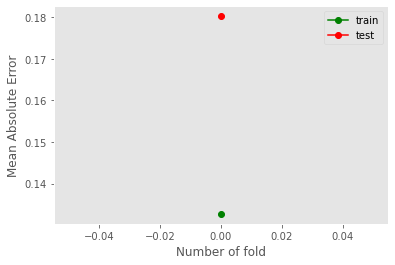

In [52]:
test_model(model, X, y)

In [53]:
kf = KFold(n_splits=5)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = KNeighborsClassifier(n_neighbors=2)
   model.fit(X_train, y_train)
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

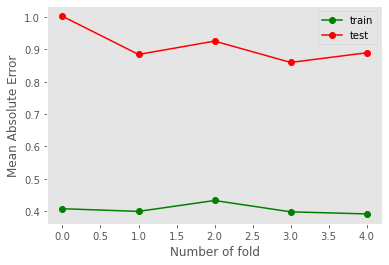

In [54]:
plt.plot(mae_train, 'o-', color='green', label='train')
plt.plot(mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()